In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Platinum.csv")

In [3]:
df.head()

,Open,Close,High,Low,Date
0,933.5,930.5,933.5,930.5,1/1/2018
1,931.0,945.5,946.5,931.0,1/2/2018
2,945.0,957.0,961.0,940.5,1/3/2018
3,955.0,964.0,966.5,945.0,1/4/2018
4,963.0,969.5,970.5,959.5,1/5/2018


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

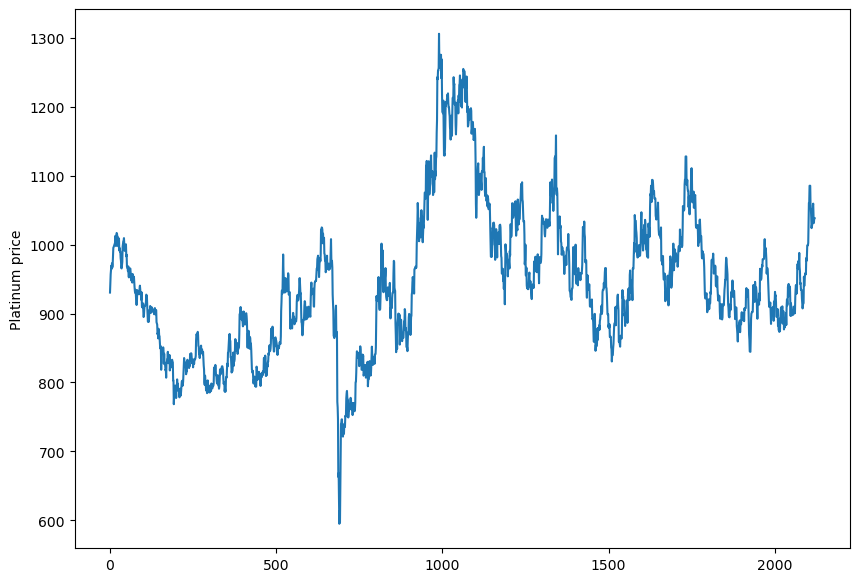

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Platinum price")
plt.show()


In [6]:
t = .8
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.10169857510080603
c:  855.4303573662179


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,1027.911141
1,1028.012839
2,1028.114538
3,1028.216236
4,1028.317935
...,...
420,1070.624542
421,1070.726241
422,1070.827939
423,1070.929638


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 11.305536726773378
Mean Squared Error (MSE): 13523.58011758773
Root Mean Squared Error (RMSE): 116.29092878461213


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[1071.13303516 1071.23473373 1071.33643231 1071.43813088 1071.53982946
 1071.64152803 1071.74322661 1071.84492518 1071.94662376 1072.04832233
 1072.15002091 1072.25171948 1072.35341806 1072.45511663 1072.55681521
 1072.65851378 1072.76021236 1072.86191093 1072.96360951 1073.06530808
 1073.16700666 1073.26870523 1073.37040381 1073.47210238 1073.57380096
 1073.67549953 1073.77719811 1073.87889668 1073.98059526 1074.08229383
 1074.18399241 1074.28569098 1074.38738956 1074.48908813 1074.59078671
 1074.69248528 1074.79418386 1074.89588243 1074.99758101 1075.09927958
 1075.20097816 1075.30267673 1075.40437531 1075.50607388 1075.60777246
 1075.70947103 1075.81116961 1075.91286818 1076.01456676 1076.11626533
 1076.21796391 1076.31966249 1076.42136106 1076.52305964 1076.62475821
 1076.72645679 1076.82815536 1076.92985394 1077.03155251 1077.13325109
 1077.23494966 1077.33664824 1077.43834681 1077.54004539 1077.64174396
 1077.74344254 1077.84514111 1

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

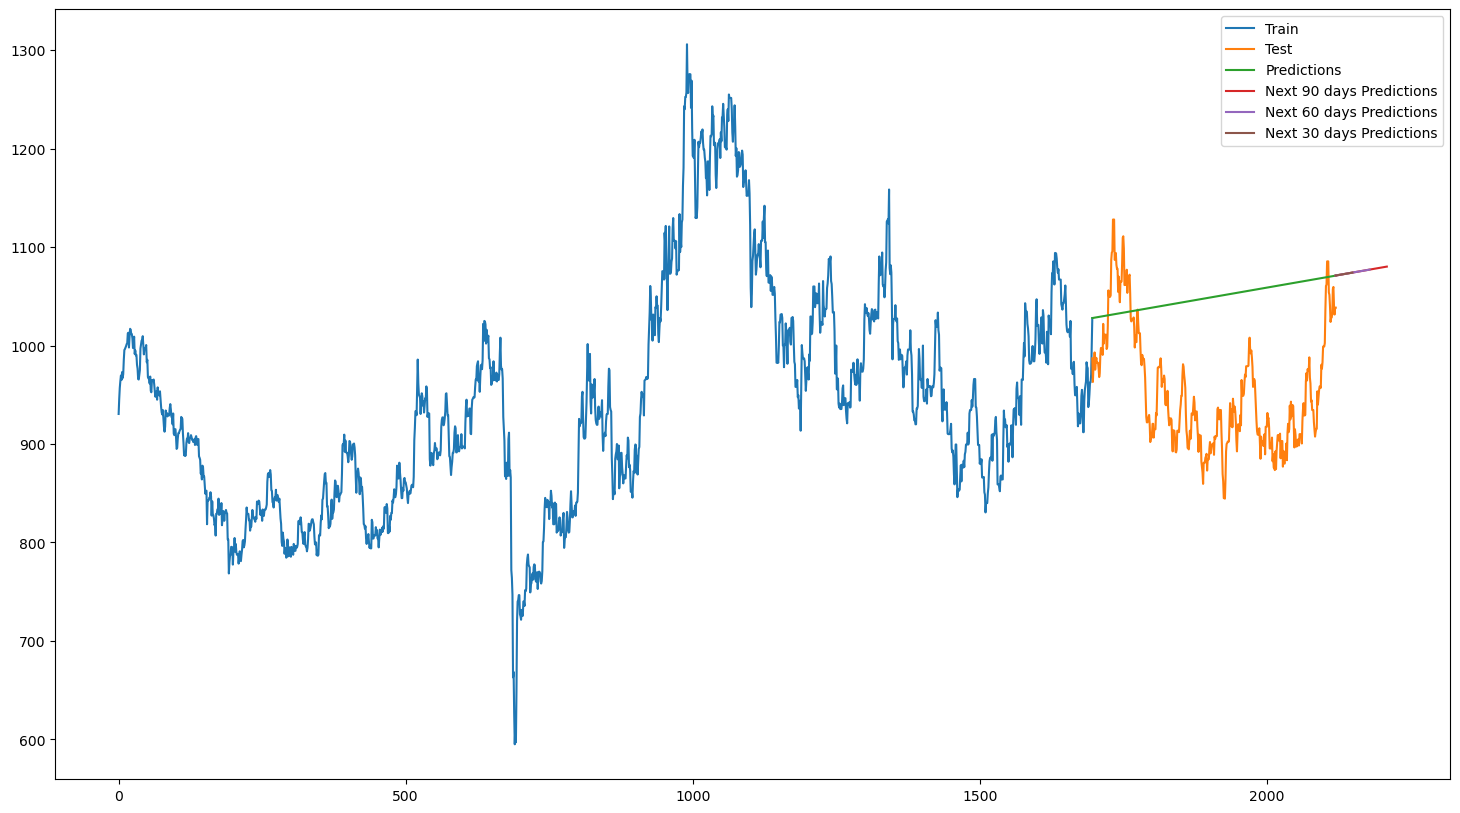

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])
plt.show()